<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/Complete_main_store_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impact of Flactuating Oil Prices on the Favorita stores in Ecuador.

Ecuador is a country located in the coast of the North western region of Southern America. It's capital is Quito city. The larger population of Eucador is latin Americans.

In this study, we will be predicting the sales of Favorita Stores in Ecuador. Ecuador is a major petroleum exporter. It is also prone to earthquakes, volcanic eruptions, and tsunamis. The most recent major earthquake was on  April 16th, 2016. The most recent was 2022-03-26 which had minor damage.


The impact of the unbalanced natural phenomena is especially felt on oil production and pricing, which in turn affects sales. To reduce the impact of the negative consequences, the sales managers, through a team of data scientists, decided to do a prediction of sales by predicting oil price fluctuations so that Favorita Stores can prepare accordingly for the expected oil price fluctuations caused by the earthquakes.


## Research Question

### a.) Defining the question

To determine the oil price trend for pre and post the major earthquake phenomena in 2016 in order to predict future oil prices which will enable Favorita store owners to prepare accordingly.

### b.) Defining metric for success

Success of the project will be determined by ability to correctly predict daily oil prices in Ecuador therefore shading a light to Favorita store owners on what to expect in the future.

###c.) Understanding the context 

We are required to define the trend of oil prices before the earthquake and after the earthquake then predict future oil prices. Our conclusion and recommendations will be based on our findings. 

###d.) Recording the experimental design

i.) Importing libraries necessary for analysis.

ii.) Reading the datasets.

iii.) Previewing datasets and their information.

iv.) Data cleaning procedures; checking and dealing with outliers and anomalies, imputing null values, deleting duplicates, converting columns into appropriate datatypes, checking and removing whitespaces and renaming column appropriately. 

v.) Perform univariate and bivariate exploratory data analysis.

vi.) Implement the solution; hypothesis testing and time series analysis.

vii.) Make conclusions based on findings

viii.) Give recommendations.

### e.) Data Relevance
 

The dataset file contains datasets for oil prices, sales, transactions, holidays, stores and family products(train and test datasets).

Combining the datasets results in a dated dataset from 2013 to 2017 which can be used in hypothesis testing and time series analysis and prediction of oil prices.

## 1.0 Importing libraries

In [ ]:
# Importing Pandas
import pandas as pd
# Importing Numpy
import numpy as np
# Importing Matplotlib
import matplotlib.pyplot as plt
# Importing Seaborn
import seaborn as sns

## 1.1 Loading the datasets

In [ ]:
# Step 1.2: Loading our Dataset

# url_hol = 'https://drive.google.com/file/d/1b2Pq6_bkOAweDm7n0bTs69Tk6XVcjIJW/view?usp=sharing'

def load_data(url):
     file_id = url.split('/')[-2]
     dwn_url = 'https://drive.google.com/uc?id='+ file_id
     df = pd.read_csv(dwn_url)
     return df

holidays = load_data('https://drive.google.com/file/d/1b2Pq6_bkOAweDm7n0bTs69Tk6XVcjIJW/view?usp=sharing')
oil = load_data("https://drive.google.com/file/d/1EsDWbT3-K2Bcn3xHs2X9DKDUAR3UBiXg/view?usp=sharing")
stores = load_data("https://drive.google.com/file/d/1UjgiCaRyfS_R69c3piS_JsyYCK3ZaYXu/view?usp=sharing")
test = load_data("https://drive.google.com/file/d/1kc6lVh4PIpaMbhog4BqHUGt2DsjDW8gg/view?usp=sharing")
transactions =load_data("https://drive.google.com/file/d/1-duHsnN6-9ZhMrw6nqEC5KciQjMy3QAp/view?usp=sharing")

# Train dataset is very large
train = pd.read_csv("/content/train.csv", index_col='id')


## 1.2 previewing the datasets

In [ ]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
train.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,2017-08-15,9,SEAFOOD,16.000,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data.drop(['id'], axis = 1, inplace=True)
data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029400 entries, 0 to 3029399
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 115.6+ MB


In [ ]:
data.tail()

,date,store_nbr,family,sales,onpromotion
3029395,2017-08-31,9,POULTRY,NaN,1
3029396,2017-08-31,9,PREPARED FOODS,NaN,0
3029397,2017-08-31,9,PRODUCE,NaN,1
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9
3029399,2017-08-31,9,SEAFOOD,NaN,0


In [ ]:
def merge(t1,t2):
    final = t1.merge(t2, how= 'left', on = 'date')
    return final

df1 = merge(data, holidays)
df1.head()


,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type         object 
 6   locale       object 
 7   locale_name  object 
 8   description  object 
 9   transferred  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 258.7+ MB


In [ ]:
df3 = merge(df1, oil)
df3.head()

,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type         object 
 6   locale       object 
 7   locale_name  object 
 8   description  object 
 9   transferred  object 
 10  dcoilwtico   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 282.2+ MB


In [ ]:
store = df3.merge(transactions[['store_nbr', 'date', 'transactions']], how='left')
store.head()

,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   type          object 
 6   locale        object 
 7   locale_name   object 
 8   description   object 
 9   transferred   object 
 10  dcoilwtico    float64
 11  transactions  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 305.8+ MB


In [ ]:
df = store.merge(stores, how='left', on='store_nbr')
df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   type_x        object 
 6   locale        object 
 7   locale_name   object 
 8   description   object 
 9   transferred   object 
 10  dcoilwtico    float64
 11  transactions  float64
 12  city          object 
 13  state         object 
 14  type_y        object 
 15  cluster       int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 399.8+ MB


In [ ]:
# Renaming columns
df.rename(columns={'type_x': 'holiday_type',
                   'type_y': 'store_type',
                   'dcoilwtico': 'daily_oil_prices'}, inplace=True)
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13


In [ ]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_nbr         int64  
 2   family            object 
 3   sales             float64
 4   onpromotion       int64  
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       object 
 10  daily_oil_prices  float64
 11  transactions      float64
 12  city              object 
 13  state             object 
 14  store_type        object 
 15  cluster           int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 399.8+ MB


In [ ]:
df.dtypes

date                 object
store_nbr             int64
family               object
sales               float64
onpromotion           int64
holiday_type         object
locale               object
locale_name          object
description          object
transferred          object
daily_oil_prices    float64
transactions        float64
city                 object
state                object
store_type           object
cluster               int64
dtype: object

In [ ]:
# Convert sales to float
df['sales'] = df['sales'].astype('float')
df['sales'].dtypes

dtype('float64')

## 1.3 Data cleaning

### Validation

The dataset is obtained from kaggle, an open sorce platform for data scientists and analysis to stumble upon new real world datasets for exploration.



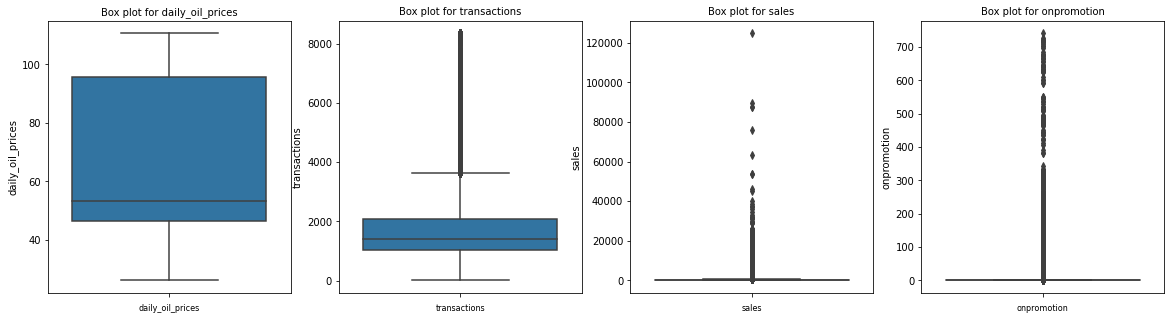

In [ ]:
# Check for outliers

col_names = ['daily_oil_prices','transactions','sales', 'onpromotion']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(20,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = df[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


box(col_names)


In [ ]:
# checking for anomalies

# quantiles

def quantiles(columns):
  for column in columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1={Q1},Q3={Q3}, IQR={IQR}, lowerbound={lb}, upperbound={ub}')

quantiles(col_names)


daily_oil_prices : 
Q1=46.46,Q3=95.72, IQR=49.26, lowerbound=-27.43, upperbound=169.61
transactions : 
Q1=1046.0,Q3=2081.0, IQR=1035.0, lowerbound=-506.5, upperbound=3633.5
sales : 
Q1=0.0,Q3=196.011, IQR=196.011, lowerbound=-294.0165, upperbound=490.02750000000003
onpromotion : 
Q1=0.0,Q3=0.0, IQR=0.0, lowerbound=0.0, upperbound=0.0


In [ ]:
# Look for Negative sales values
df[df['sales'] < 0]

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster


In [ ]:
# Look for Negative transactions values
df[df['transactions'] < 0]

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster


In [ ]:
# Missing values
df.isnull().sum()

date                      0
store_nbr                 0
family                    0
sales                 28512
onpromotion               0
holiday_type        2578554
locale              2578554
locale_name         2578554
description         2578554
transferred         2578554
daily_oil_prices     962280
transactions         277629
city                      0
state                     0
store_type                0
cluster                   0
dtype: int64

In [ ]:
df.dropna(thresh=10, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993826 entries, 0 to 3070385
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_nbr         int64  
 2   family            object 
 3   sales             float64
 4   onpromotion       int64  
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       object 
 10  daily_oil_prices  float64
 11  transactions      float64
 12  city              object 
 13  state             object 
 14  store_type        object 
 15  cluster           int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 388.3+ MB


In [ ]:
# Fill null daily oil prices with their mean
df['daily_oil_prices'] = df['daily_oil_prices'].fillna(df['daily_oil_prices'].mean()) 

oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
# Fill null holiday_type with 'normal'
df['holiday_type'].fillna('Normal', inplace=True)

In [ ]:
# Fill null locale and locale_name  with 'unknown'
df['locale'].fillna('Unknown', inplace=True)
df['locale_name'].fillna('Unknown', inplace=True)

In [ ]:
df['locale_name'].unique()

array(['Ecuador', 'Unknown', 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad',
       'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga',
       'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas',
       'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas'], dtype=object)

In [ ]:
df['locale'].unique()

array(['National', 'Unknown', 'Local', 'Regional'], dtype=object)

In [ ]:
# Fill null sales with 0
df.sales = df.sales.fillna(0.0)

In [ ]:
# Fill description null values with unknown for holidays

df['description'] = df['description'].fillna('Unknown')

In [ ]:
# Fill null transferred with unspecified
df['transferred'] = df.transferred.fillna('unspecified') 

In [ ]:
df.transferred.isnull().sum()

0

In [ ]:
df.transferred.unique()

array([False, 'unspecified', True], dtype=object)

In [ ]:
# Convert boolean values of transferred to string
df.transferred = df.transferred.replace(False,'false').replace(True,'true')

In [ ]:
df.transferred.unique()

array(['false', 'unspecified', 'true'], dtype=object)

In [ ]:
# Fill null transactions with 0
transactions.isnull().sum()


df.transactions.fillna('0', inplace=True)

# convert transactions to integer
df.transactions = df.transactions.astype(int)

In [ ]:
# Convert onpromotion to integer
df['onpromotion'] = df['onpromotion'].astype(int)
df['onpromotion'].dtypes

dtype('int64')

 Since the transactions dataset has no missing values, fill null values with 0.

In [ ]:
# The number of missing values
df.isnull().sum().sum()

0

In [ ]:
# Check for duplicates
df.duplicated().sum()


0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# check for whitespaces

# column name 
df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# column values
for column in df.columns:
  if df[column].dtypes == 'object':
    df[column] = df[column].str.lstrip(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13


In [ ]:
# information about our dataset
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993826 entries, 0 to 3070385
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_nbr         int64  
 2   family            object 
 3   sales             float64
 4   onpromotion       int64  
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       object 
 10  daily_oil_prices  float64
 11  transactions      int64  
 12  city              object 
 13  state             object 
 14  store_type        object 
 15  cluster           int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 388.3+ MB


date                2993826
store_nbr           2993826
family              2993826
sales               2993826
onpromotion         2993826
holiday_type        2993826
locale              2993826
locale_name         2993826
description         2993826
transferred         2993826
daily_oil_prices    2993826
transactions        2993826
city                2993826
state               2993826
store_type          2993826
cluster             2993826
dtype: int64

##1.4 Exploratory Data Analysis

### a.) Univariate

In [ ]:
#Summary statistics

df.describe(include='all')

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
count,2993826,2.993826e+06,2993826,2.993826e+06,2.993826e+06,2993826,2993826,2993826,2993826,2993826,2.993826e+06,2.993826e+06,2993826,2993826,2993826,2.993826e+06
unique,1684,NaN,33,NaN,NaN,7,4,25,102,3,NaN,NaN,22,16,5,NaN
top,2014-06-25,NaN,AUTOMOTIVE,NaN,NaN,Normal,Unknown,Unknown,Unknown,unspecified,NaN,NaN,Quito,Pichincha,D,NaN
freq,7128,NaN,90722,NaN,NaN,2489520,2489520,2489520,2489520,2489520,NaN,NaN,1010328,1066857,1004091,NaN
mean,NaN,2.736784e+01,NaN,3.657658e+02,2.671982e+00,NaN,NaN,NaN,NaN,NaN,6.799825e+01,1.590165e+03,NaN,NaN,NaN,8.493232e+00
std,NaN,1.559206e+01,NaN,1.115990e+03,1.237399e+01,NaN,NaN,NaN,NaN,NaN,2.151892e+01,1.022681e+03,NaN,NaN,NaN,4.667854e+00
min,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,2.619000e+01,0.000000e+00,NaN,NaN,NaN,1.000000e+00
25%,NaN,1.400000e+01,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.896000e+01,9.600000e+02,NaN,NaN,NaN,4.000000e+00
50%,NaN,2.700000e+01,NaN,1.200000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,6.799825e+01,1.347000e+03,NaN,NaN,NaN,9.000000e+00
75%,NaN,4.100000e+01,NaN,2.040000e+02,0.000000e+00,NaN,NaN,NaN,NaN,NaN,9.207000e+01,2.003000e+03,NaN,NaN,NaN,1.300000e+01


In [ ]:
# Function to plot barchart
def plotbar(column, figsize):
  plt.figure(figsize = figsize)
  df[column].value_counts().plot.bar()
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

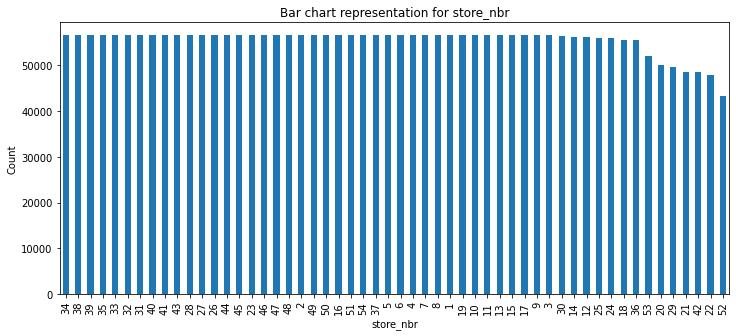

In [ ]:
# Store number representation
plotbar('store_nbr', (12,5))

Only 7 stores are not equally represented in the dataset

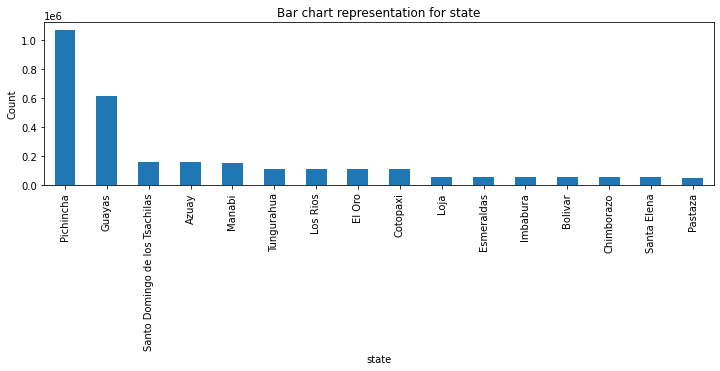

In [ ]:
# state representation
plotbar('state', (12,3))



Pichincha has the highest representation while Pastaza has the least count in the dataset.

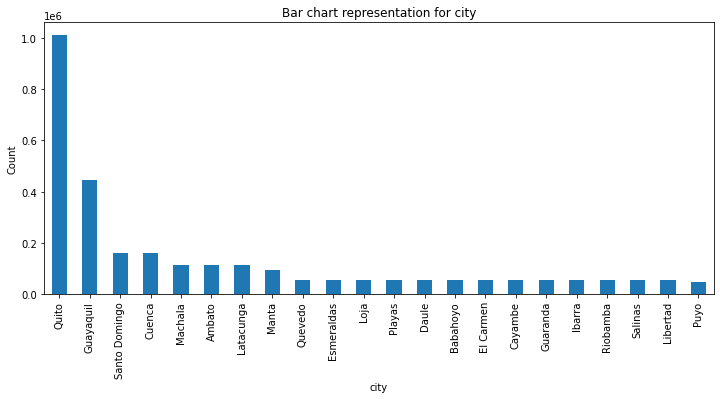

In [ ]:
# city representation
plotbar('city', (12,5))



Quito city has the highest representation while Puyo city has the least.

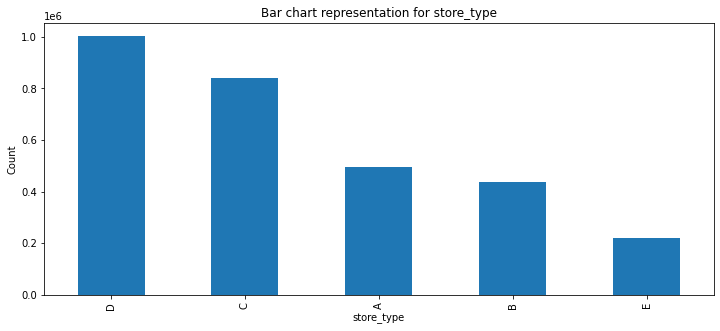

In [ ]:
# store_type representation
plotbar('store_type', (12,5))

Type D stores have the highest representation while Type E has the least representation.

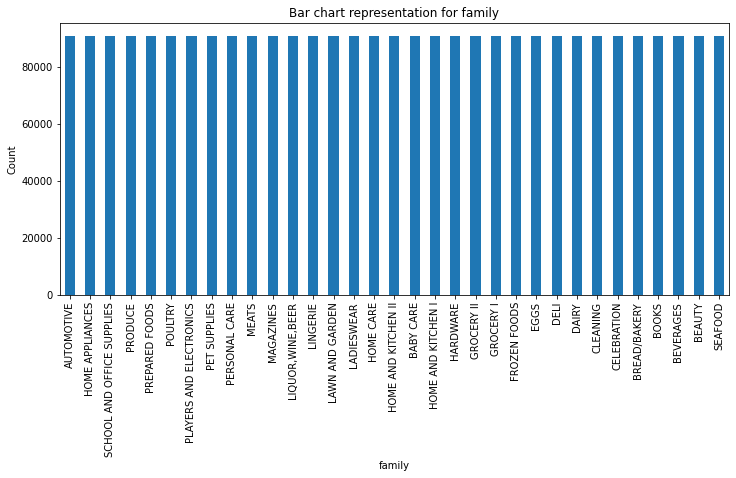

In [ ]:
# Family representation
plotbar('family', (12,5))

All family products are equally represented.

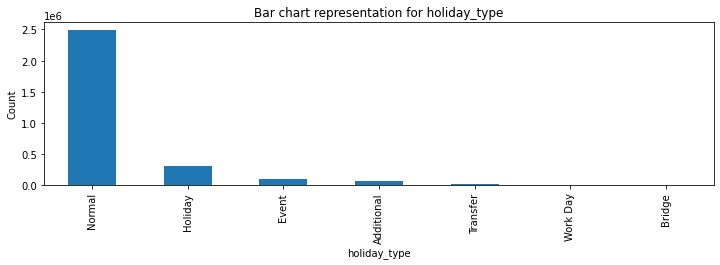

In [ ]:
# Bar chart for holiday_type
plotbar('holiday_type', (12,3))

Normal - Not a holiday

Holiday - A single day for holiday

Event - A special function day

Additional - Additional days that surround a major seasonal holiday 

Work Day - Working day

Bridge - extra days that are added to a holiday (e.g., to extend the break across a long weekend).

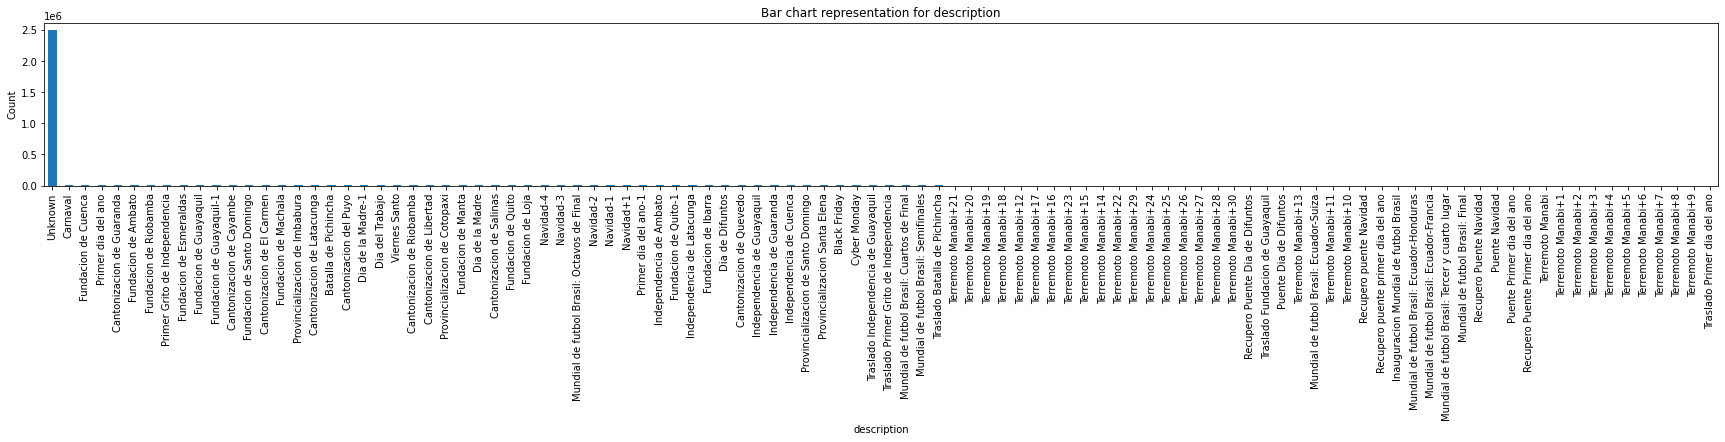

In [ ]:
# Bar chart for holiday name(description)
plotbar('description', (30,3))

Since dates have specific dates, we shall assume that they do not occur annually as most holidays do. Rather we shall use the holiday date specified in the dataset. This results in a few value counts for all described holidays.

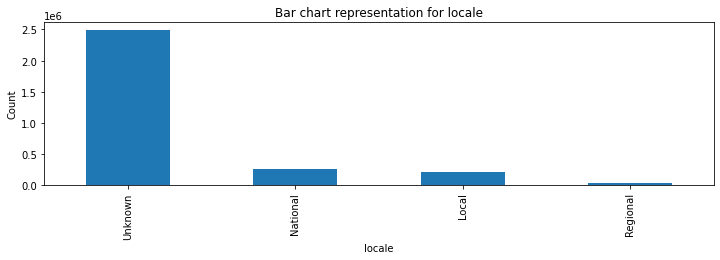

In [ ]:
plotbar('locale', (12,3))

In [ ]:
# pie chart function.

def pie(column, explode): 
    df[column].value_counts().plot.pie(autopct='%1.1f%%', explode = explode, shadow=True, startangle=40)
    plt.axis('equal')
    plt.title('Pie chart for {}'.format(column))
    return plt.show()

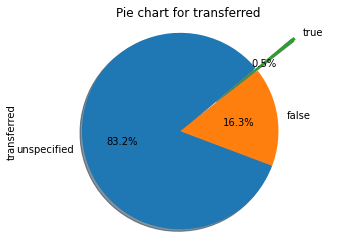

In [ ]:
# Pie chart for transferred
pie('transferred', (0,0,0.5))

Very few days that were holidays have been transferred to other days.

### b.) Bivariate analysis

i.) Numerical - Numerical

In [ ]:
# orrelation between variables
df.corr()

,store_nbr,sales,onpromotion,daily_oil_prices,transactions,cluster
store_nbr,1.000000e+00,0.044581,0.009678,-5.369053e-14,0.125568,-6.395645e-02
sales,4.458140e-02,1.000000,0.427747,-5.781373e-02,0.229652,3.794513e-02
onpromotion,9.678485e-03,0.427747,1.000000,-1.372098e-01,0.045698,5.188882e-03
daily_oil_prices,-5.369053e-14,-0.057814,-0.137210,1.000000e+00,-0.047942,-2.775128e-14
transactions,1.255681e-01,0.229652,0.045698,-4.794223e-02,1.000000,1.893301e-01
cluster,-6.395645e-02,0.037945,0.005189,-2.775128e-14,0.189330,1.000000e+00


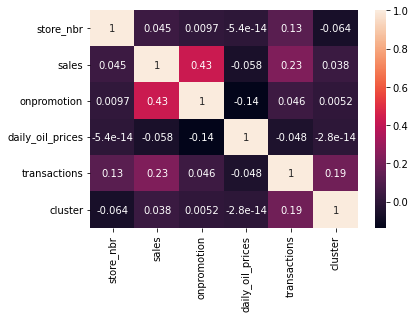

In [ ]:
# Heatmap for correlation
sns.heatmap(df.corr(), annot = True)

Most of the variables are either positively or negatively weakly correlated.

Sales to transactions and Sales to on_promotion are moderately positively correlated. 

In [ ]:
# scatter plot function
def plotscatter(column1, column2):
  plt.scatter(df[column1], df[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

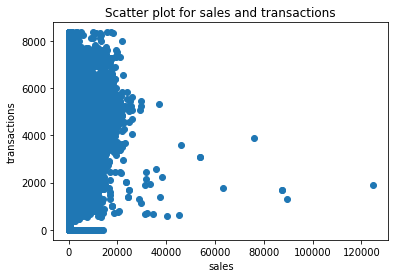

In [ ]:
plotscatter('sales', 'transactions')

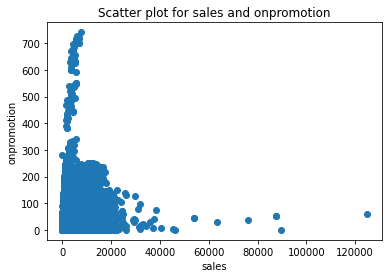

In [ ]:
plotscatter('sales', 'onpromotion')

ii.) Categorical - Numerical

In [ ]:
# Categorical to numerical bar chart

def barchart(column1, column2, figsize):
    group.plot(x=column1, y=column2, kind='bar', figsize=figsize) 
    plt.title(f'Barchart for {column1} vs {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    return plt.show()

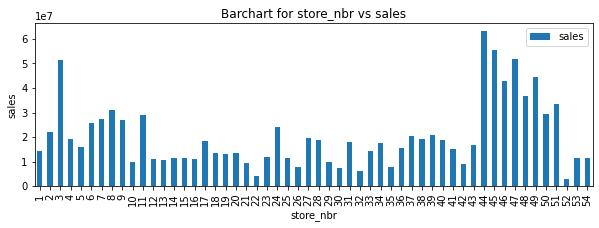

In [ ]:
group = df.groupby('store_nbr', as_index=False)['sales'].sum()
barchart('store_nbr','sales', (10,3))

store_nbr 44 has the most sales while store_nbr 52 has the least sales.

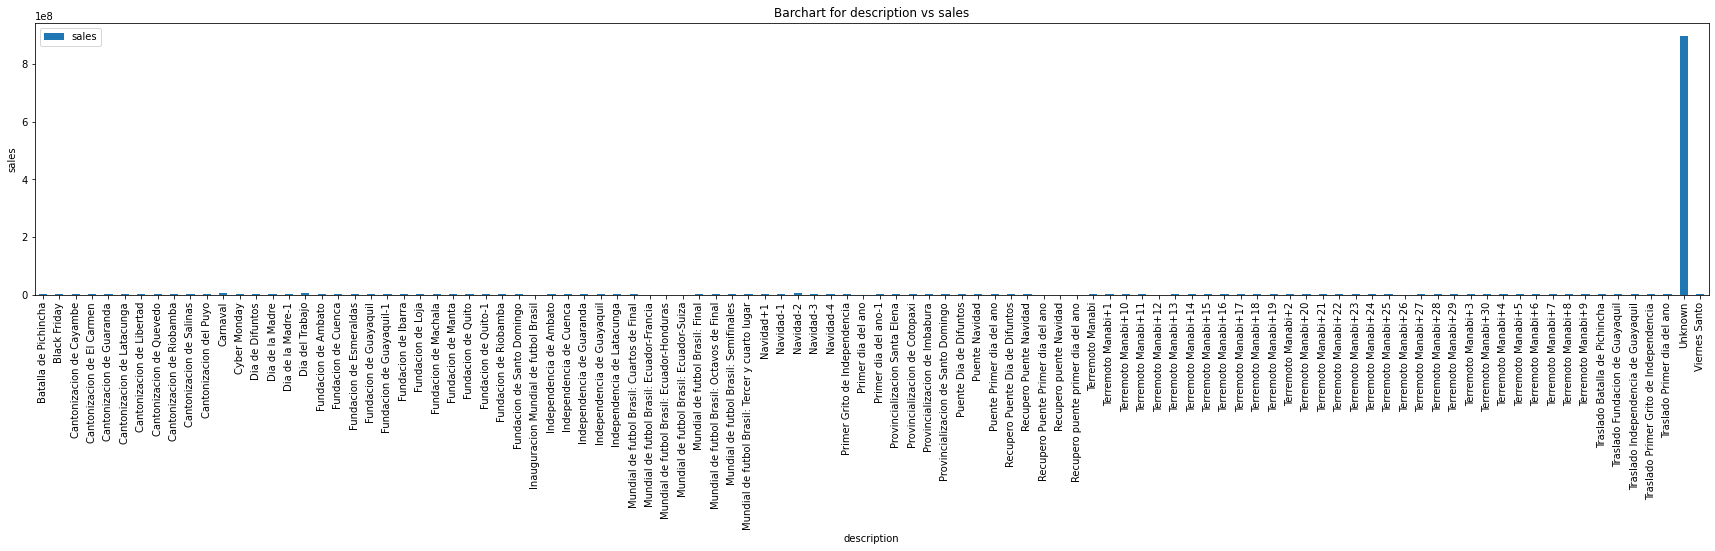

In [ ]:
# description vs sales
group = df.groupby('description', as_index=False)['sales'].sum()
barchart('description','sales', (30,5))

There are no sales made during a holiday period.

In [ ]:
# Group data by date
grouped = df.groupby(['date'], as_index=False).sum()
grouped.head()

,date,store_nbr,sales,onpromotion,daily_oil_prices,transactions,cluster
0,2013-01-01,49005,2511.618999,0,121172.886413,25410,15114
1,2013-01-02,49005,496092.417944,0,165975.480000,3076095,15114
2,2013-01-03,49005,361461.231124,0,165672.540000,2590632,15114
3,2013-01-04,49005,354459.677093,0,165939.840000,2590302,15114
4,2013-01-05,49005,477350.121229,0,121172.886413,3087909,15114


In [ ]:
grouped.drop(['cluster'], axis=1, inplace=True)
grouped.head()

,date,store_nbr,sales,onpromotion,daily_oil_prices,transactions
0,2013-01-01,49005,2511.618999,0,121172.886413,25410
1,2013-01-02,49005,496092.417944,0,165975.480000,3076095
2,2013-01-03,49005,361461.231124,0,165672.540000,2590632
3,2013-01-04,49005,354459.677093,0,165939.840000,2590302
4,2013-01-05,49005,477350.121229,0,121172.886413,3087909


In [ ]:
# convert date to datetime
from datetime import datetime
grouped['date'] = pd.to_datetime(grouped['date'])
grouped['date'].dtypes

dtype('<M8[ns]')

In [ ]:
# Line graphs

def line(column1, column2, figsize):
    plt.figure(figsize = figsize)
    plt.plot(grouped[column1], grouped[column2])
    plt.xticks(rotation=90)
    plt.title("{} vs {}".format(column1, column2), fontsize=14, y=1.015)
    plt.xlabel(column1)
    plt.ylabel(column2)
    return plt.show()

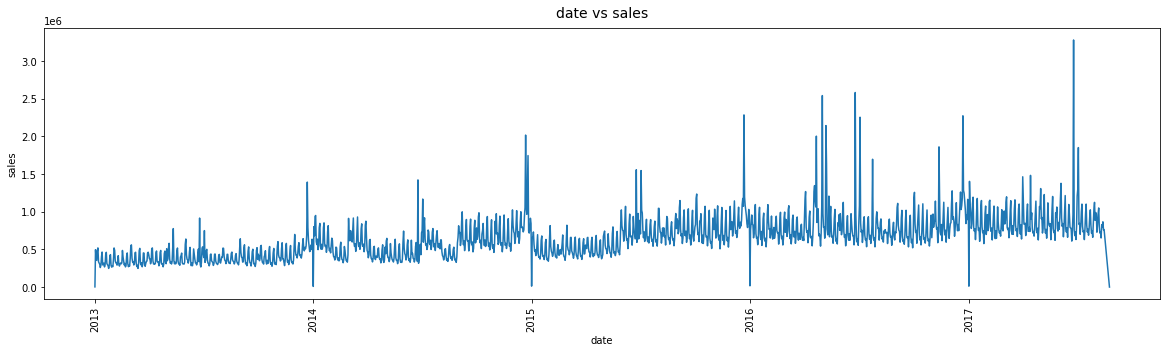

In [ ]:
line('date', 'sales', (20,5))

There has been an activity between 2013 and 2014, followed by steady downward trend in sales past 2017.

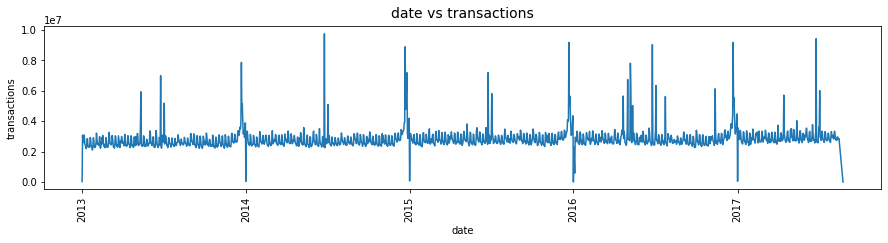

In [ ]:
line('date', 'transactions', (15,3))

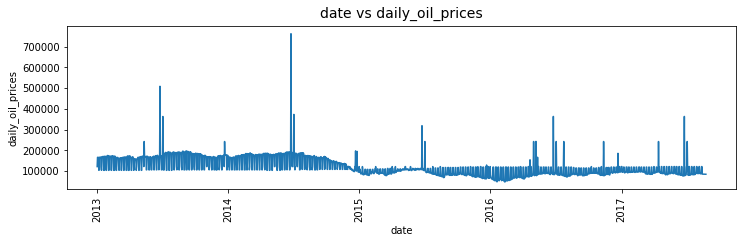

In [ ]:
line('date', 'daily_oil_prices', (12,3))

There has been fluctuations in daily oil prices between 2013 and 2014. There was a major drop in 2014 followed by a steady upward trend in the following years.

## 1.5 Implementing the solution

### 1.51 Hypothesis Testing

We suspect that the downward trend in sales could be caused by an increase in daily oil prices hence we shall confirm this using a hypothesis test. Inorder to also factor the earthquake pre and post trend in oil sales, we shall do 2 hypothesis tests.

###I. Pre_Earthquake Hypothesis Test
### 1. Defining H0 and H1
 H0: The mean daily oil prices in 2015 is equal to the mean daily oil prices in 2016.

H1: The mean daily oil prices in 2015 is lower than the mean daily oil prices in 2016.

### Sampling

We are going to use stratified sampling method to select our sample to use for our hypothesis test. The strata will be the years 2014 and 2016.

In [ ]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

#  format='%Y%m%d'

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster,year
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013


In [ ]:
# create a column for year inorder to split dataset according to year

df['year'] = pd. DatetimeIndex(df['date']). year
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster,year
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,false,67.998253,0,Quito,Pichincha,D,13,2013


In [ ]:
sample_data = df[(df['year'] == 2015) | (df['year'] == 2016)]

In [ ]:
sample_data['year'].value_counts()

2016    663168
2015    644688
Name: year, dtype: int64

In [ ]:
# Using stratified sampling
sample = sample_data.groupby(['year'], group_keys=False).apply(lambda group: group.sample(frac=0.0005))

# Choosing 2 random samples from the cluster sample 

sample['year'].value_counts()

2016    332
2015    322
Name: year, dtype: int64

- We will classify the population into two independent samples.
1. Sample for 2015.
2. Sample for 2016.
- Then we will check for normality to get the test we should use, whether parametric or non-parametric.


In [ ]:
# Split the datasets into 2016 and 2015.
s16 = sample[sample['year'] == 2016]
s15 = sample[sample['year'] == 2015]

### 2. Choosing significance level

We shall use the most common significane level of 5%. i.e α = 0.05

In [ ]:
# Check variability
from scipy.stats import levene
levene(s16['daily_oil_prices'], s15['daily_oil_prices'])

LeveneResult(statistic=9.336330815321983, pvalue=0.0023382733155602443)

Since the p_value < 0.05, there is no homogenity between variables.

In [ ]:
# Check for normality using shapiro wilk test
from scipy.stats import shapiro
shapiro(sample['daily_oil_prices'])

(0.8984914422035217, 2.1822245943022093e-20)

The p_value < 0.05 hence, hence not Gaussian. 

Since varaibility and normality conditions for parametric tests have not been met, we shall use non_parametric test.

### 3. Determining statistic and p value using Mann Whitney U-test.

In [ ]:
# Performing non_parametric test

# importing stats from scipy

from scipy import stats

stats.mannwhitneyu(s15['daily_oil_prices'],s16['daily_oil_prices']) 

MannwhitneyuResult(statistic=50376.0, pvalue=0.09890073728581683)

### 4. Decision

The p_value(0.0989) > 0.05(significance level) hence we fail to reject the null hypothesis.


### 5. Conclusion
Our test is not statistically significant. 

We do not have enough evidence that mean daily oil prices in 2015 is less than mean daily oil price in 2016.

###II. Post_Earthquake Hypothesis Test

### 1. Defining H0 and H1
 H0: The mean daily oil prices in 2016 is equal to the mean daily oil prices in 2017.

H1: The mean daily oil prices in 2016 is lower than the mean daily oil prices in 2017.

#### Sampling

We shall still use stratified sampling technique for which our strata will be the 2016 and 2017 data. 

In [ ]:
sample1_data = df[(df['year'] == 2016) | (df['year'] == 2017)]

In [ ]:
sample1_data['year'].value_counts()

2016    663168
2017    412401
Name: year, dtype: int64

In [ ]:
# Using stratified sampling
sample = sample1_data.groupby(['year'], group_keys=False).apply(lambda group: group.sample(frac=0.0005))

# Choosing 2 random samples from the cluster sample 

sample['year'].value_counts()

2016    332
2017    206
Name: year, dtype: int64

- We will classify the population into two independent samples.
1. Sample for 2016.
2. Sample for 2017.
- Then we will check for normality to get the test we should use, whether parametric or non-parametric.

In [ ]:
# Split the datasets into 2016 and 2017.
s16 = sample[sample['year'] == 2016]
s17 = sample[sample['year'] == 2017]

### 2. Choosing significance level

We shall still use the most common significane level of 5%. i.e α = 0.05

In [ ]:
# Check variability
from scipy.stats import levene
levene(s16['daily_oil_prices'], s17['daily_oil_prices'])

LeveneResult(statistic=18.93502770865925, pvalue=1.6198800279843573e-05)

Since the p_value < 0.05, there is no homogenity between variables.

In [ ]:
# Check for normality using shapiro wilk test
from scipy.stats import shapiro
shapiro(sample['daily_oil_prices'])

(0.8753406405448914, 2.3690094083174988e-20)

The p_value < 0.05 hence, hence the daily oil prices distribution is not Gaussian. 

Since both conditions for parametric tests have not been met again, we shall use non_parametric test.

### 3. Determining statistic and p value using Mann Whitney U-test.

In [ ]:
# Performing non_parametric test

# importing stats from scipy

from scipy import stats

stats.mannwhitneyu(s16['daily_oil_prices'],s17['daily_oil_prices']) 

MannwhitneyuResult(statistic=25479.5, pvalue=2.0707168040121295e-07)

### 4. Decision

The p_value(2.0707e-10) < 0.05(significance level) hence we reject the null hypothesis.

### 5. Conclusion
Our test is now statistically significant. 

We have enough evidence that mean daily oil prices in 2016 is less than mean daily oil price in 2017.

## Hypothesis Final conclusion

From the two hypothesis tests, we can safely conclude that there was a major impact of the 2016 earthquake on the daily oil prices. This is because the difference in the mean of daily oil prices between 2015 and 2016 is not as significant as that of between 2016 and 2017(p=2.0707e-10).

 For further investigations, we shall consider doing a time series analysis. 

### 1.52 Time series

In [ ]:
# Grouping date values by summing daily oil prices for all stores
df1 = df.groupby('date')[['daily_oil_prices', 'sales']].mean()

In [ ]:
df1.head()

,daily_oil_prices,sales
date,,
2013-01-01,67.998253,1.409438
2013-01-02,93.140000,278.390807
2013-01-03,92.970000,202.840197
2013-01-04,93.120000,198.911154
2013-01-05,67.998253,267.873244


In [ ]:
# confirming date as index
df1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
               '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
               '2017-08-15', '2017-08-24'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

### Visualizations

In [ ]:
# setting seaborn figuresize

#sns.set(rc={'figure.figsize':(11, 8)})

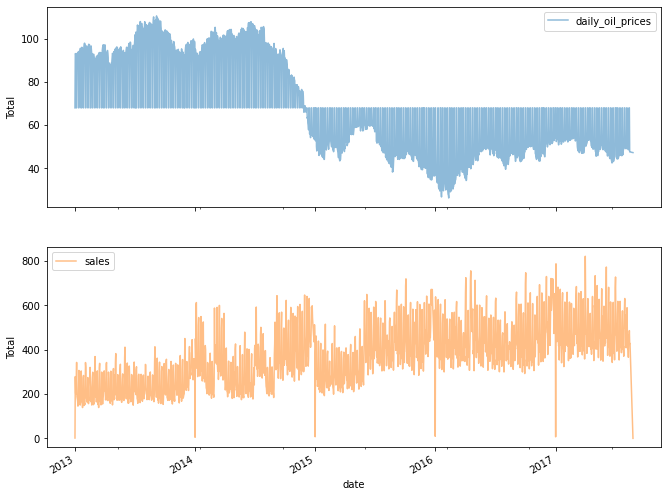

In [ ]:
# Line plot

cols_plot = ['daily_oil_prices', 'sales']
axes = df1[cols_plot].plot(alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total')

#df1[['daily_oil_prices', 'sales']].plot(linewidth=0.5)
#plt.title('Daily Oil Prices and sales Trend')
#plt.ylabel('daily_oil_prices/ sales')
#plt.show()

There are so many data points hence the line plot is crowded and hard to read. Let’s plot the data as dots instead.

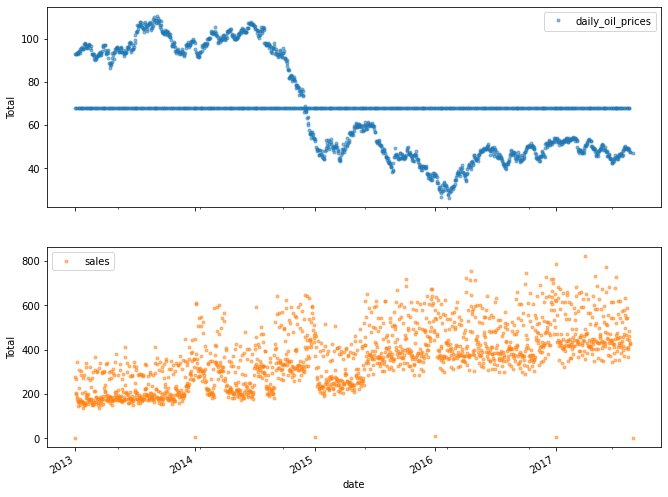

In [ ]:
# Dotted plot

cols_plot = ['daily_oil_prices', 'sales']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total')

#df1['daily_oil_prices'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 5))
#plt.title('Daily Oil Prices Trend')
#plt.ylabel('daily_oil_prices')
#plt.show()

Daily oil prices was highest near the end of 2013 and lowest at the beginning of 2016.

The daily oil price dropped below the mean at the end of 2014 onwards.



The mean sales per day has a high volatility. It is difficult to determine mean sales per day from the curve.

#### Seasonality

Text(0, 0.5, 'Daily Oil Prices')

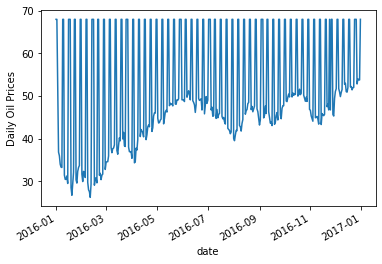

In [ ]:
ax = df1.loc['2016', 'daily_oil_prices'].plot()
ax.set_ylabel('Daily Oil Prices')

We can see the weekly oscillations. The daily oil prices gradually increases from March 2016 to January 2017. 

There was a slight increase in daily oil prices during the earthquake in April 2016. It then dropped then increased gradually afterwards. 


Text(0, 0.5, 'Daily Oil Prices')

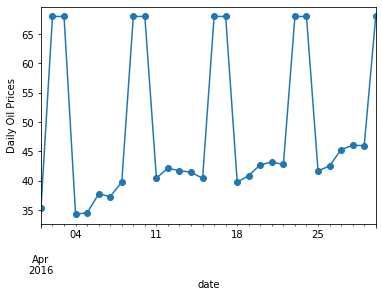

In [ ]:
# Looking into 16/04/2016, the day of the earthquake phenomena
ax = df1.loc['2016-04', 'daily_oil_prices'].plot(linestyle='-', marker='o')
ax.set_ylabel('Daily Oil Prices')

Text(0, 0.5, 'Total sales')

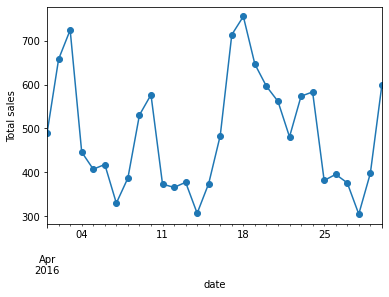

In [ ]:
ax = df1.loc['2016-04', 'sales'].plot(linestyle='-', marker='o')
ax.set_ylabel('Total sales')

There is a very steep increase in sales on 16th to 17th April.

A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied to assist the victims of the earthquake with water and first need products. This could have led to the increase in sales for the next two days. 

Due to the impact, supermarket sales were greatly affected for several weeks after the earthquake.

#### Customizing time series plots

In [ ]:
# for nicely formatted tick labels

import matplotlib.dates as mdates

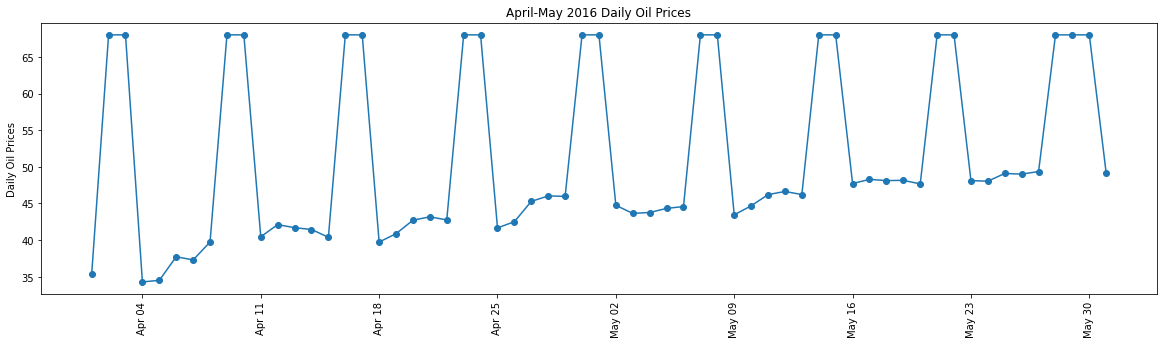

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df1.loc['2016-04':'2016-05', 'daily_oil_prices'], marker='o', linestyle='-')
ax.set_ylabel('Daily Oil Prices')
plt.xticks(rotation=90)
ax.set_title('April-May 2016 Daily Oil Prices')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Daily oil prices are low during the week and high during the weekend.

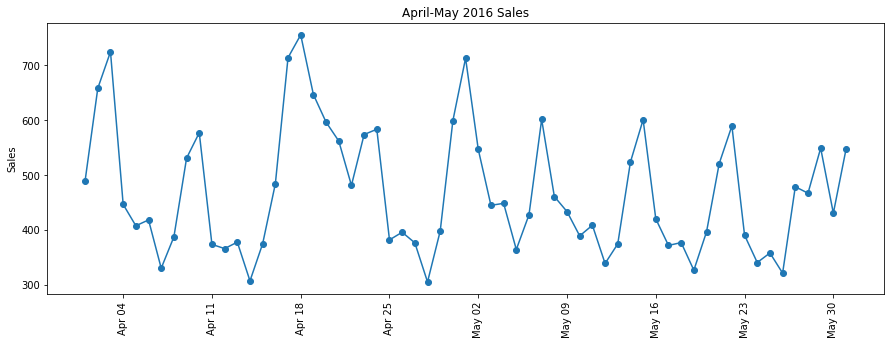

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2016-04':'2016-05', 'sales'], marker='o', linestyle='-')
ax.set_ylabel('Sales')
plt.xticks(rotation=90)
ax.set_title('April-May 2016 Sales')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The mean sales have been dropping on almost every Thursday of the week.

### Time series forecasting using ARIMA model. 

In [ ]:
# importing necessary libraries
import warnings
import itertools
import statsmodels.api as sm
import matplotlib 
import pandas.util.testing as tm

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams.update({'figure.figsize': (5,5)})
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Create equal time period such as months in date as index
# we shall use the oil dataset which contains dates and prices hence fit for time series analysis.

# Loading the dataset
oil = load_data("https://drive.google.com/file/d/1EsDWbT3-K2Bcn3xHs2X9DKDUAR3UBiXg/view?usp=sharing")

# Creating month column and setting it as index. 
oil['Month'] = pd.to_datetime(oil['date'], infer_datetime_format=True)
df2 = oil.set_index(['Month'])

In [ ]:
# checking for null values ratio
ratio = df2.isnull().sum().sum()/df2.shape[0]
ratio

# We have only 3.5% null values hence we can drop these null values

0.035303776683087026

In [ ]:
df2.dropna(inplace=True)

In [ ]:
# Lets drop null values to maintain accuracy of results
df2['dcoilwtico'] = df2['dcoilwtico'].fillna(df2['dcoilwtico'].mean())

In [ ]:
# confirm we have no null values
df2.isnull().sum().sum()

0

In [ ]:
from datetime import datetime
df2.head()

,date,dcoilwtico
Month,,
2013-01-02,2013-01-02,93.14
2013-01-03,2013-01-03,92.97
2013-01-04,2013-01-04,93.12
2013-01-07,2013-01-07,93.20
2013-01-08,2013-01-08,93.21


In [ ]:
df2.drop(['date'], axis=1, inplace=True)
df2.head()

,dcoilwtico
Month,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21


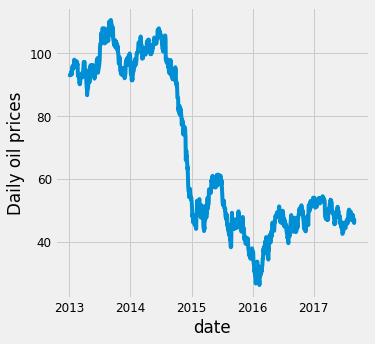

In [ ]:
# plot graph
plt.xlabel('date')
plt.ylabel('Daily oil prices')
plt.plot(df2)

The mean is not constant therefore the data is non_stationary.

### Checking for stationarity

a.) Plotting moving average/Rolling statistics

In [ ]:
# Determining rolling staistics
rolmean = df2.rolling(window=12).mean()

rolstd = df2.rolling(window=12).std()

# Display
print(rolmean, rolstd)

            dcoilwtico
Month                 
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
...                ...
2017-08-25   47.779167
2017-08-28   47.600833
2017-08-29   47.405000
2017-08-30   47.269167
2017-08-31   47.243333

[1175 rows x 1 columns]             dcoilwtico
Month                 
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
...                ...
2017-08-25    0.658213
2017-08-28    0.720309
2017-08-29    0.680007
2017-08-30    0.793089
2017-08-31    0.787428

[1175 rows x 1 columns]


Nan values exist for the first 11 values since we have chosen our window=12(months) hence the mean and standard deviation is given on the last month of the year.

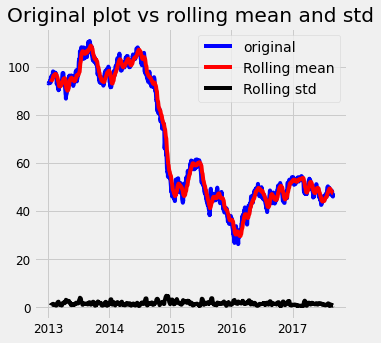

In [ ]:
# Plotting the rolling statistics
original = plt.plot(df2, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Original plot vs rolling mean and std')
plt.show(block=False)

The time series is non-stationary.

b.) Using Dickey_Fuller test.

H0: Time series is non_stationary.

H1: Time series is stationary.

In [ ]:
# Perform Augmented Dickey_fuller Test

# import function
from statsmodels.tsa.stattools import adfuller

In [ ]:
#print results
dftest = adfuller(df2['dcoilwtico'], autolag='AIC')
# AIC gives information about what you wanted in
# time series(exact and  actual values and analyzes the difference between them)

dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p value', 'Total lags used', 'Number of observations used'])

for key,value in dftest[4].items():
  dfoutput['critical values(%s)'%key] = value

print(dfoutput)  

Test statistic                   -0.877178
p value                           0.795395
Total lags used                   1.000000
Number of observations used    1173.000000
critical values(1%)              -3.435937
critical values(5%)              -2.864007
critical values(10%)             -2.568084
dtype: float64


The p_value > 0.05 significance level and test statistic is greater than critical values hence we cannot reject the null hypothesis.

The data is therefore not stationary.

We will therefore estimate the trend

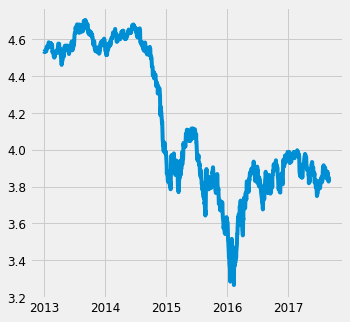

In [ ]:
# Estimating the trend

df2_logscale = np.log(df2)
plt.plot(df2_logscale)

# Other methods that can be used include
# squares, cubes et.c depending on your data.

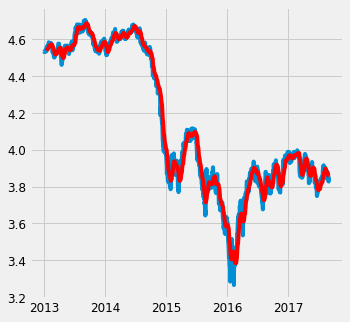

In [ ]:
# calculating moving average with the this log scale
# rolmean2 is the moving Average

rolmean2 = df2_logscale.rolling(window=12).mean()
rolstd2 = df2_logscale.rolling(window=12).std()

# plot
plt.plot(df2_logscale)
plt.plot(rolmean2, color='red')

In [ ]:
# Find the difference between the logscale dataset and the moving average
logscale_movingaverage = df2_logscale - rolmean2
logscale_movingaverage.head() 

,dcoilwtico
Month,
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
2013-01-08,NaN


In [ ]:
# Remove nan values
logscale_movingaverage.dropna(inplace=True)
logscale_movingaverage.head()

,dcoilwtico
Month,
2013-01-17,0.019815
2013-01-18,0.018890
2013-01-22,0.021147
2013-01-23,0.008652
2013-01-24,0.009797


In [ ]:
# Repeating the same process for checking stationarity for the new dataset(df2_logscale)
# Let's now create a function to check for stationariy

def test_stationarity(timeseries):

    # Determining rolling staistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plotting the rolling statistics
    original = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='Rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Original plot vs rolling mean and std')
    plt.show(block=False)

    # Perform ADFT
    dftest = adfuller(timeseries['dcoilwtico'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p value', 'Total lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
         dfoutput['critical values(%s)'%key] = value
    print(dfoutput)  


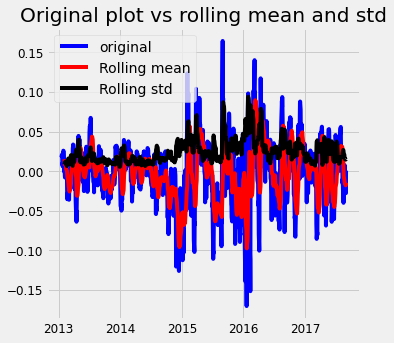

Test statistic                -9.444618e+00
p value                        4.792553e-16
Total lags used                5.000000e+00
Number of observations used    1.158000e+03
critical values(1%)           -3.436010e+00
critical values(5%)           -2.864039e+00
critical values(10%)          -2.568101e+00
dtype: float64


In [ ]:
# Test stationarity of our new dataset
test_stationarity(logscale_movingaverage)

The p_value < 0.05 hence we reject the null hypothesis. Our data is therefore stationary.

Now we calculate weighted average of the time series

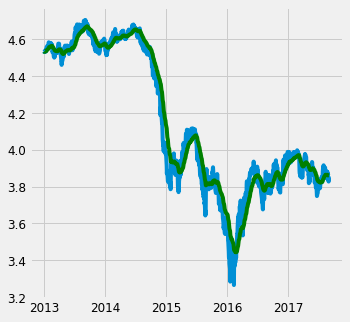

In [ ]:
exponentialDecayWeightedAverage = df2_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df2_logscale)
plt.plot(exponentialDecayWeightedAverage, color='green')

The trend is a downward trend from 2013 to 2016 followed by an upward trend. 

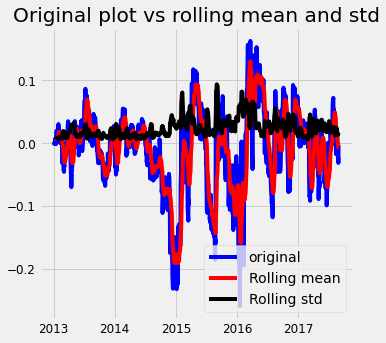

Test statistic                   -5.407388
p value                           0.000003
Total lags used                   1.000000
Number of observations used    1173.000000
critical values(1%)              -3.435937
critical values(5%)              -2.864007
critical values(10%)             -2.568084
dtype: float64


In [ ]:
# Another transformation
logscale_exDecayAverage = df2_logscale - exponentialDecayWeightedAverage
test_stationarity(logscale_exDecayAverage)

The p_value < 0.05 hence we reject the null hypothesis in favour of the alternte hypothesis that the time series is stationary. Once we discover that values are stationary, we shall shift the values into time series in order to use them in the forecasting.

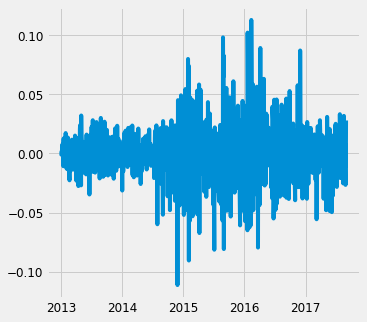

In [ ]:
# shifting
df2logdiffshifting = df2_logscale - df2_logscale.shift()
plt.plot(df2logdiffshifting)

# Here we have taken a lag of 1/ shifted the values by 1/ differentiated the time series once.
# Hence d = 1

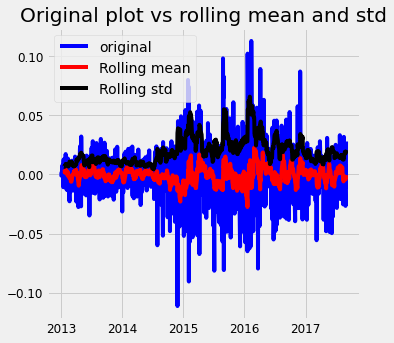

Test statistic                  -36.206393
p value                           0.000000
Total lags used                   0.000000
Number of observations used    1173.000000
critical values(1%)              -3.435937
critical values(5%)              -2.864007
critical values(10%)             -2.568084
dtype: float64


In [ ]:
# drop null values
df2logdiffshifting.dropna(inplace=True)

# test for stationarity
test_stationarity(df2logdiffshifting)

The mean and standard deviation are flat hence our time series is stationary.
The data is stationary since p_value < 0.05

In [ ]:
df2_logscale.head()

,dcoilwtico
Month,
2013-01-02,4.534104
2013-01-03,4.532277
2013-01-04,4.533889
2013-01-07,4.534748
2013-01-08,4.534855


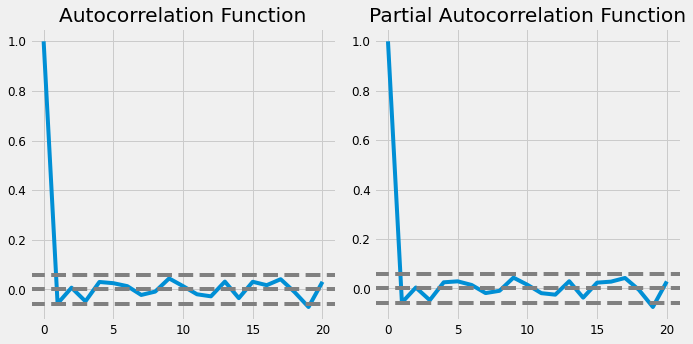

In [ ]:
# Autocorrelation graph(ACF) for getting P and Partial autocorrelation graph(PACF) for getting Q
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df2logdiffshifting, nlags=20)
lag_pacf = pacf(df2logdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(10,5))

# Plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df2logdiffshifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df2logdiffshifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df2logdiffshifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df2logdiffshifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The values of p and q are close to 1, hence we take p=q=1. 

Plotting AR model...


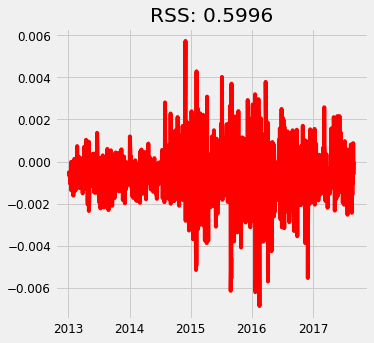

In [ ]:
# substitute the values of P, Q and D into the ARIMA model

# import ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# AR(Auto regressive) model
# We take P=0, D=1, Q=1 
model = ARIMA(df2_logscale, order=(0,1,1))
results_AR = model.fit(disp=-1)
plt.plot(results_AR.fittedvalues, color='red')
#RSS - Residual Sum of Squares 
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df2logdiffshifting['dcoilwtico'])**2))
print('Plotting AR model...')

RSS should be small.

Plotting MA model...


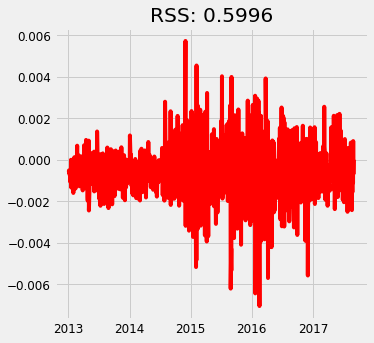

In [ ]:
# MA(Moving Average) model
# We take P=1, D=1, Q=0 
model = ARIMA(df2_logscale, order=(1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df2logdiffshifting['dcoilwtico'])**2))
print('Plotting MA model...')

The value of RSS with respect to Auto Regressive model and Moving Average model is 0.5996.

Plotting ARIMA model...


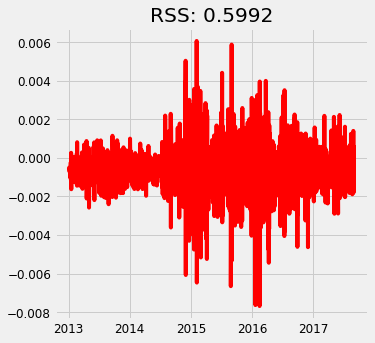

In [ ]:
# Combining results(ARIMA model).
model = ARIMA(df2_logscale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df2logdiffshifting['dcoilwtico'])**2))
print('Plotting ARIMA model...')

Our RSS value is now 0.5992 for the two models combined.

In [ ]:
# Convert predicted values into a series
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2013-01-03   -0.000579
2013-01-04   -0.000514
2013-01-07   -0.000726
2013-01-08   -0.000565
2013-01-09   -0.000621
dtype: float64


In [ ]:
# convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2013-01-03   -0.000579
2013-01-04   -0.001093
2013-01-07   -0.001819
2013-01-08   -0.002385
2013-01-09   -0.003005
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(df2_logscale.iloc[0], index= df2_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
2013-01-02         NaN
2013-01-03   -0.000579
2013-01-04   -0.001093
2013-01-07   -0.001819
2013-01-08   -0.002385
dtype: float64

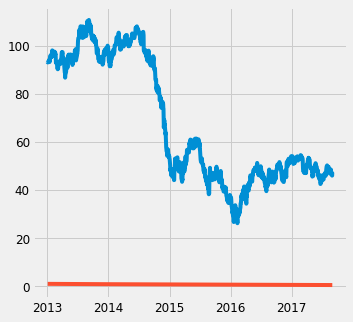

In [ ]:
# Revert back values to original format as we had transformed them using logs

# Find exponential of the values
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df2)
plt.plot(predictions_ARIMA)

In [ ]:
# Check dataset
df2_logscale.info()

# dataset has 1175 rows

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1175 entries, 2013-01-02 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB


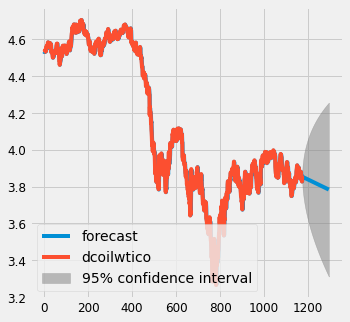

In [ ]:
# Now we predict the values
# Let's predict for 10 years
# data points will be 1175 plus number of months we want to predict
# 1175 + 120 = 1235
# This gives the plot with predictions
results_ARIMA.plot_predict(1, 1295)

# Let's predict for 10 years i.e 12monthsx10 = 120. This gives array fomart.
x = results_ARIMA.forecast(steps=120)

##1.6 Conclusion

The prediction shows that there will be a downward trend in oil prices in Ecuador for the next 10 years. This is a prediction that can be challenged by factors uncatered for.

There is hope for business in Ecuador:)

Fall in daily oil prices will cause a fall in prices of oil related products leading to an increase in sales especially in regards to Favorita stores.
The confidence maargin assures us of a rise of up to 4.25 max and a drop of upto 3.45. This is good news for Favorita stores.

##1.7 Recommendations

Ecuador store owners are advised to be on the look out for any slight change in political, economic and social status of the country as this may affect oil prices. 

In regards to disastrous phenomenas such as earthquakes which are frequent in the country, store owners are advised to always be prepared for whatever may come. The predicted trend of oil prices may take a turn for the worst incase of a severe earthquake as the one encountered on 16th April, 2016. 